<a href="https://colab.research.google.com/gist/jonghank/44fa57d89965d4a54ff375fcdd4dcd71/stage_illumination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Least squares examples
$$
\newcommand{\eg}{{\it e.g.}}
\newcommand{\ie}{{\it i.e.}}
\newcommand{\argmin}{\operatornamewithlimits{argmin}}
\newcommand{\mc}{\mathcal}
\newcommand{\mb}{\mathbb}
\newcommand{\mf}{\mathbf}
\newcommand{\minimize}{{\text{minimize}}}
\newcommand{\diag}{{\text{diag}}}
\newcommand{\cond}{{\text{cond}}}
\newcommand{\rank}{{\text{rank }}}
\newcommand{\range}{{\mathcal{R}}}
\newcommand{\null}{{\mathcal{N}}}
\newcommand{\tr}{{\text{trace}}}
\newcommand{\dom}{{\text{dom}}}
\newcommand{\dist}{{\text{dist}}}
\newcommand{\R}{\mathbf{R}}
\newcommand{\Z}{\mathbf{Z}}
\newcommand{\SM}{\mathbf{S}}
\newcommand{\ball}{\mathcal{B}}
\newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}
$$

__<div style="text-align: right"> ASE2030: Linear algebra and statistics, Inha University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@inha.ac.kr) </div>_

<br>

---

## Stage illumination

A concert hall has a square stage that is divided into $m$ pixels (or regions), and we want to illuminate the stage by using $n$ fixed lamps which are located below the ceiling (but with different heights). We let $y_i$ denote the lighting level in pixel $i$, so the $m$-vector $y$ gives the illumination levels on the stage. We let $x_i$ denote the power level at which lamp $i$ operates, so the $n$-vector $x$ gives the set of lamp powers. 

The vector of illumination levels on the stage is a linear function of the lamp powers, so we have $y = Ax$ for some $m\times n$ matrix $A$. The $j$th column of $A$ gives the illumination pattern for lamp $j$, that is, the illumination when lamp $j$ has unit power and all other lamps are off, so it is determined by the relative geometry between the $j$th lamp and the stage surfaces. We assume that $m\gg n$ so we use way smaller number of lamps compared to the number of pixels that we divide the stage into. The $i$th row of $A$ gives the sensitivity of pixel $i$ to the $n$ lamp powers. 

The following cell defines the locations of 10 lamps, and builds the matrix $A$ that maps the lamp powers, $x$, to the illumination on the stage floor, $y$. The plot for example shows the achieved stage illumination pattern with the lamp locations, when Lamp-0 and Lamp-6 are on (with specific powers). So it is like the stage seen from the ceiling.


[[ 0.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  2.  0.]
 ...
 [24. 22.  0.]
 [24. 23.  0.]
 [24. 24.  0.]]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 2. 0.]
[0. 2. 0.]
[0. 2. 0.]
[0. 2. 0.]
[0. 2. 0.]
[0. 2. 0.]
[0. 2. 0.]
[0. 2. 0.]
[0. 2. 0.]
[0. 2. 0.]
[0. 3. 0.]
[0. 3. 0.]
[0. 3. 0.]
[0. 3. 0.]
[0. 3. 0.]
[0. 3. 0.]
[0. 3. 0.]
[0. 3. 0.]
[0. 3. 0.]
[0. 3. 0.]
[0. 4. 0.]
[0. 4. 0.]
[0. 4. 0.]
[0. 4. 0.]
[0. 4. 0.]
[0. 4. 0.]
[0. 4. 0.]
[0. 4. 0.]
[0. 4. 0.]
[0. 4. 0.]
[0. 5. 0.]
[0. 5. 0.]
[0. 5. 0.]
[0. 5. 0.]
[0. 5. 0.]
[0. 5. 0.]
[0. 5. 0.]
[0. 5. 0.]
[0. 5. 0.]
[0. 5. 0.]
[0. 6. 0.]
[0. 6. 0.]
[0. 6. 0.]
[0. 6. 0.]
[0. 6. 0.]
[0. 6. 0.]
[0. 6. 0.]
[0. 6. 0.]
[0. 6. 0.]
[0. 6. 0.]
[0. 7. 0.]
[0. 7. 0.]
[0. 7. 0.]
[0. 7. 0.]
[0. 7. 0.]
[0. 7. 0.]
[0. 7. 0.]
[0. 7. 0.]
[0. 7. 0.]
[0. 7. 0.]
[0. 8. 0.]
[0. 8. 0.]
[0

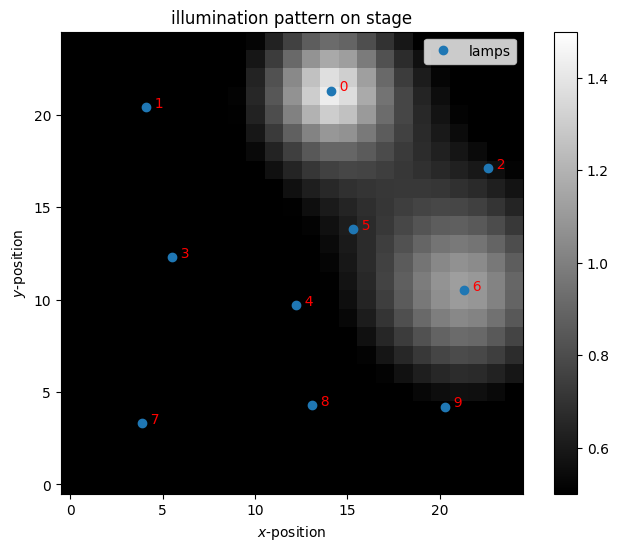

(625, 10)


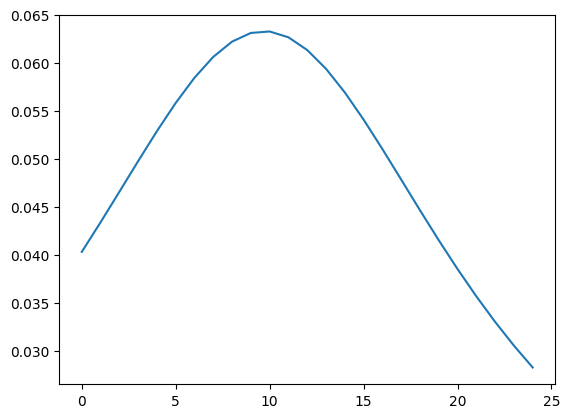

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 25
m = N*N
pix_x = np.arange(0,N).reshape(-1,1)@np.ones((1,N))
pix_y = np.ones((N,1))@np.arange(0,N).reshape(1,-1)
pixels = np.hstack((pix_x.reshape(m,1), pix_y.reshape(m,1), np.zeros((m,1))))

n = 10
lamp_positions = np.array([[14.1, 21.3, 3.5],  # [x-pos, y_pos, height]
                           [ 4.1, 20.4, 4.0],  # for 10 lamps
                           [22.6, 17.1, 6.0],  
                           [ 5.5, 12.3, 4.0], 
                           [12.2,  9.7, 4.0], 
                           [15.3, 13.8, 6.0], 
                           [21.3, 10.5, 5.5], 
                           [ 3.9,  3.3, 5.0],
                           [13.1,  4.3, 5.0], 
                           [20.3,  4.2, 4.5]])

# print(pixels)

A = np.zeros((m,n))
for i in range(m):
  for j in range(n):
    print(pixels[i,:])
    A[i,j] = 1.0 / np.linalg.norm(pixels[i,:]-lamp_positions[j,:])**2
A *= m/np.sum(A) 

x_ex = np.zeros(n)    # example
x_ex[0] = 1.5         # lamp-1 on with power=1.5
x_ex[6] = 3.0         # lamp-5 on with power=3.0
y_ex = A.dot(x_ex)    # illumination on stage

plt.figure(figsize=(8,6), dpi=100)
plt.imshow(y_ex.reshape(N,N).T, cmap='gray', origin='lower')
plt.plot(lamp_positions[:,0], lamp_positions[:,1], 'o', label='lamps')
for i in range(n):
  plt.text(lamp_positions[i,0],lamp_positions[i,1], f"  {i}", color="r" )
plt.colorbar()
plt.clim(0.5,1.5)
plt.xlabel(r'$x$-position')
plt.ylabel(r'$y$-position')
plt.title('illumination pattern on stage')
plt.legend()
plt.show()

print(A.shape)
plt.plot(A[:25, 4])

<br>

The goal of this problem is to find the vector of lamp powers, $x$, that results in a desired illumination pattern on stage $y^\text{des}$, such as $y^\text{des}= \mathbf{1}$, which is uniform illumination across the stage (the symbol $\mathbf{1}$ represents the one-vector where all of its elements are 1's). In other words we look for $x$ such that $Ax \approx y^\text{des}$. We can solve this by formulating the least squares problem minimizing $\| Ax-y^\text{des} \|_2^2$.

<br>

**_(Problem 2a)_** What is the best lamp powers for uniform illumination across the stage? You may print the numbers out, or show them by a simple plot.

optimal x: [0.74052293 1.45879628 2.85592337 0.74958989 0.00371709 0.39106832
 0.14895015 2.13036265 0.95557295 1.47908737]


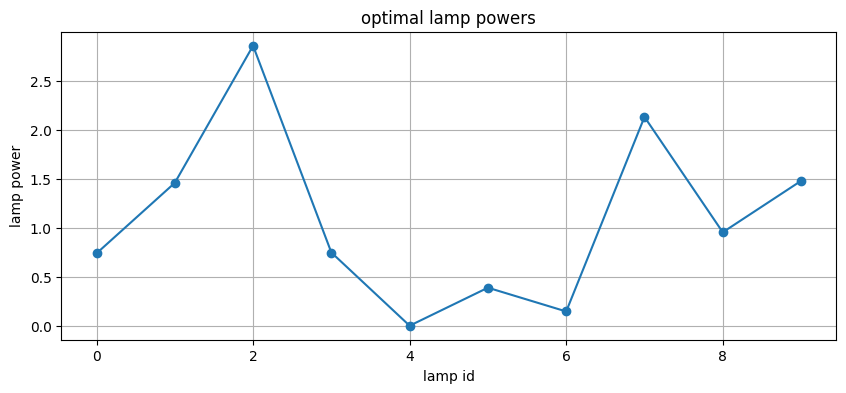

In [2]:
# your code here

y_des = np.ones(m) 
x_hat = np.linalg.lstsq(A, y_des, rcond=None)[0]
print(f"optimal x: {x_hat}")

plt.figure(figsize=(10,4), dpi=100)
plt.plot(x_hat,"o-")
plt.xlabel("lamp id")
plt.ylabel("lamp power")
plt.title("optimal lamp powers")
plt.grid()
plt.show()

<br>

**_(Problem 2b)_** Display the stage illumination pattern obtained from the above solution, and display the stage illumination pattern obtained from other (non-optimal) simple approaches, for example $x = \mathbf{1}$ (the uniform lamp powers).

Show that the stage illumination pattern obtained from your solution reveals better uniformity. You can compare the histograms of the illumination levels on $m$ pixels for each illumination pattern.

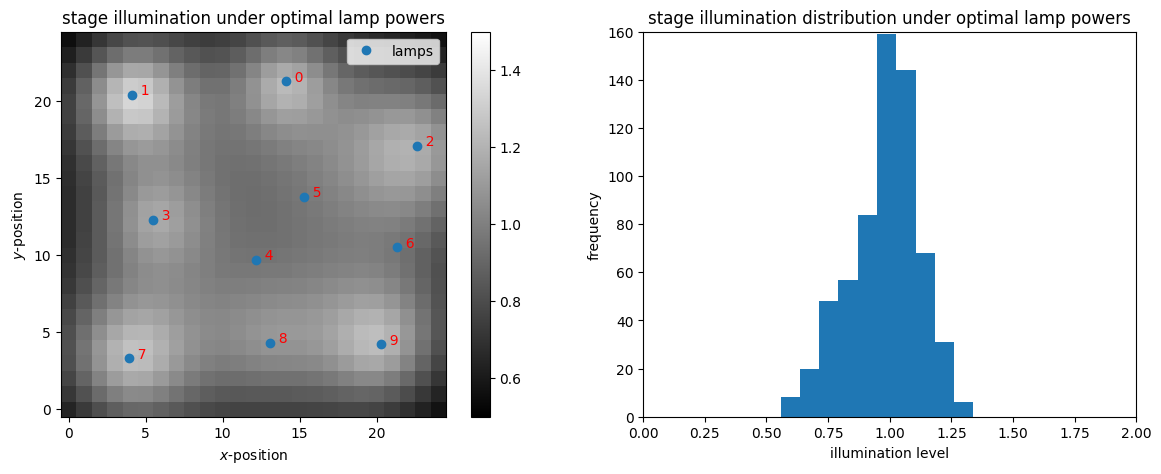

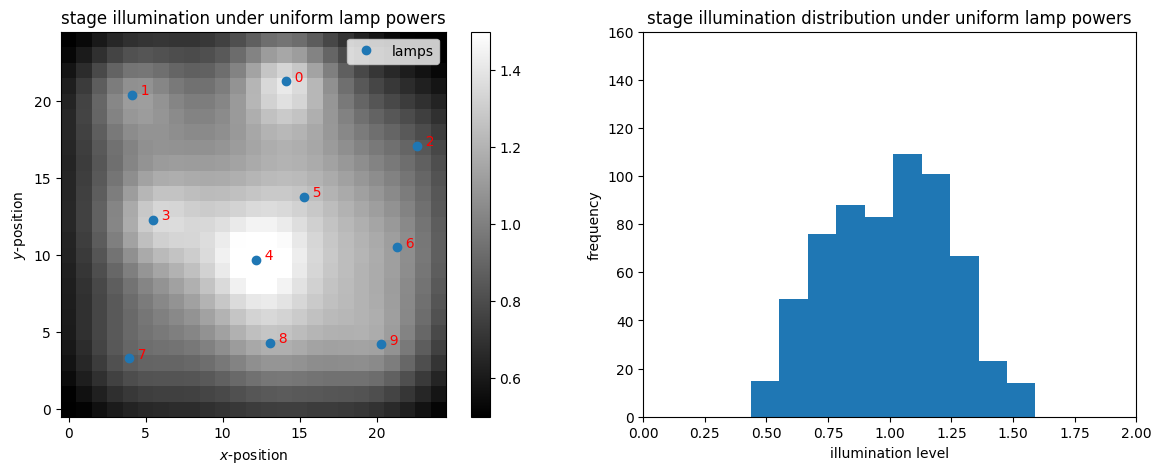

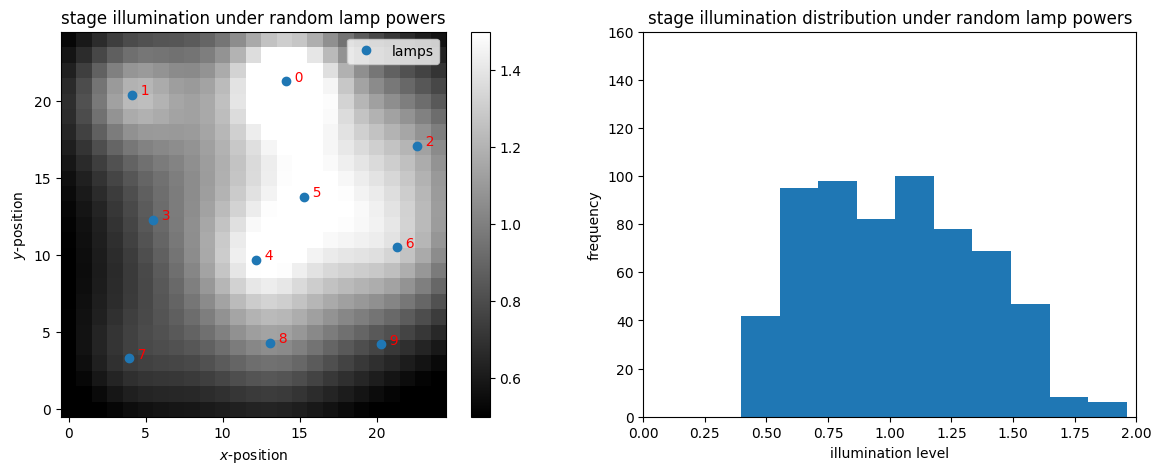

In [3]:
# your code here

y_opt = A.dot(x_hat)
y_one = A.dot(np.ones(n))
y_rnd = A.dot(np.random.rand(n)*2)

plt.figure(figsize=(14,5), dpi=100)
plt.subplot(121)
plt.imshow(y_opt.reshape(N,N).T, cmap='gray', origin='lower')
plt.plot(lamp_positions[:,0], lamp_positions[:,1], 'o', label='lamps')
for i in range(n):
  plt.text(lamp_positions[i,0],lamp_positions[i,1], f"  {i}", color="r" )
plt.colorbar()
plt.clim(0.5,1.5)
plt.xlabel(r'$x$-position')
plt.ylabel(r'$y$-position')
plt.title('stage illumination under optimal lamp powers')
plt.legend()
plt.subplot(122)

plt.hist(y_opt)
plt.xlabel('illumination level')
plt.ylabel('frequency')
plt.title('stage illumination distribution under optimal lamp powers')
plt.xlim(0,2)
plt.ylim(0,160)
plt.show()

plt.figure(figsize=(14,5), dpi=100)
plt.subplot(121)
plt.imshow(y_one.reshape(N,N).T, cmap='gray', origin='lower')
plt.plot(lamp_positions[:,0], lamp_positions[:,1], 'o', label='lamps')
for i in range(n):
  plt.text(lamp_positions[i,0],lamp_positions[i,1], f"  {i}", color="r" )
plt.colorbar()
plt.clim(0.5,1.5)
plt.xlabel(r'$x$-position')
plt.ylabel(r'$y$-position')
plt.title('stage illumination under uniform lamp powers')
plt.legend()
plt.subplot(122)
plt.hist(y_one)
plt.xlabel('illumination level')
plt.ylabel('frequency')
plt.title('stage illumination distribution under uniform lamp powers')
plt.xlim(0,2)
plt.ylim(0,160)
plt.show()

plt.figure(figsize=(14,5), dpi=100)
plt.subplot(121)
plt.imshow(y_rnd.reshape(N,N).T, cmap='gray', origin='lower')
plt.plot(lamp_positions[:,0], lamp_positions[:,1], 'o', label='lamps')
for i in range(n):
  plt.text(lamp_positions[i,0],lamp_positions[i,1], f"  {i}", color="r" )
plt.colorbar()
plt.clim(0.5,1.5)
plt.xlabel(r'$x$-position')
plt.ylabel(r'$y$-position')
plt.title('stage illumination under random lamp powers')
plt.legend()
plt.subplot(122)
plt.hist(y_rnd)
plt.xlabel('illumination level')
plt.ylabel('frequency')
plt.title('stage illumination distribution under random lamp powers')
plt.xlim(0,2)
plt.ylim(0,160)
plt.show()


y_des shape: (625,)
Grid size (K): 15000
B shape: (625, 15000)
w_hat non-zero count: 0
Initial lamp_positions_est:
 [[ 0.   1.   6. ]
 [ 0.   1.   5.5]
 [24.5 24.   6. ]
 [24.5 24.5  3.5]
 [24.5 24.5  4. ]
 [24.5 24.5  4.5]
 [24.5 24.5  5. ]
 [24.5 24.5  5.5]
 [24.5 24.5  6. ]
 [ 0.   0.   3.5]]
y_optim shape: (625,)


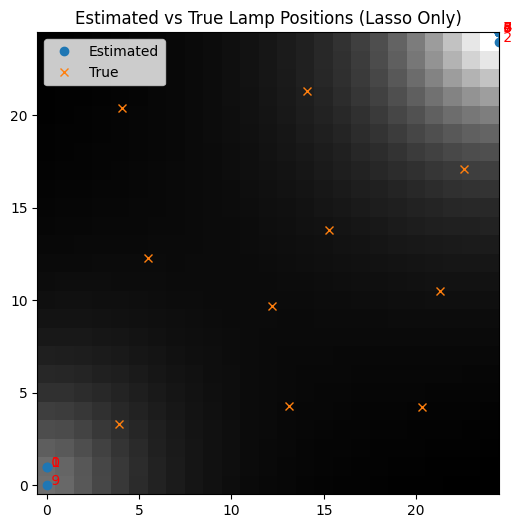

True lamp positions:
 [[14.1 21.3  3.5]
 [ 4.1 20.4  4. ]
 [22.6 17.1  6. ]
 [ 5.5 12.3  4. ]
 [12.2  9.7  4. ]
 [15.3 13.8  6. ]
 [21.3 10.5  5.5]
 [ 3.9  3.3  5. ]
 [13.1  4.3  5. ]
 [20.3  4.2  4.5]]
Estimated lamp positions:
 [[ 0.   1.   6. ]
 [ 0.   1.   5.5]
 [24.5 24.   6. ]
 [24.5 24.5  3.5]
 [24.5 24.5  4. ]
 [24.5 24.5  4.5]
 [24.5 24.5  5. ]
 [24.5 24.5  5.5]
 [24.5 24.5  6. ]
 [ 0.   0.   3.5]]
Position errors (Euclidean distance):
 [24.8425039  19.88517035  7.15681493 22.58517213 19.24396009 14.19084212
 14.36975991 29.56433662 23.21637353 20.75403575]
Mean error: 19.580896934585034


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

# 기본 설정
N = 25
m = N * N
pix_x = np.arange(0, N).reshape(-1, 1) @ np.ones((1, N))
pix_y = np.ones((N, 1)) @ np.arange(0, N).reshape(1, -1)
pixels = np.hstack((pix_x.reshape(m, 1), pix_y.reshape(m, 1), np.zeros((m, 1))))
n = 10

# 주어진 전등 위치
lamp_positions = np.array([[14.1, 21.3, 3.5],
                           [ 4.1, 20.4, 4.0],
                           [22.6, 17.1, 6.0],
                           [ 5.5, 12.3, 4.0],
                           [12.2,  9.7, 4.0],
                           [15.3, 13.8, 6.0],
                           [21.3, 10.5, 5.5],
                           [ 3.9,  3.3, 5.0],
                           [13.1,  4.3, 5.0],
                           [20.3,  4.2, 4.5]])

# 목표 조명 패턴 생성
x_ex = np.ones(n) * 3  # 모든 전등 밝기 3
A = np.zeros((m, n))
for i in range(m):
    for j in range(n):
        A[i, j] = 1.0 / np.linalg.norm(pixels[i, :] - lamp_positions[j, :])**2
A *= m / np.sum(A)
y_des = A @ x_ex
print("y_des shape:", y_des.shape)  # 디버깅: y_des 생성 확인

# 그리드 생성 (계산량 감소)
grid_res = 0.5
grid_x = np.arange(0, N, grid_res)
grid_y = np.arange(0, N, grid_res)
grid_z = np.arange(3.5, 6.1, 0.5)  # 높이 3.5~6.0, 간격 0.5
K = len(grid_x) * len(grid_y) * len(grid_z)
grid_points = np.array([(x, y, z) for x in grid_x for y in grid_y for z in grid_z])
print("Grid size (K):", K)  # 디버깅: 그리드 크기 확인

# 그리드 기반 영향 행렬 B
B = np.zeros((m, K))
for i in range(m):
    for k in range(K):
        B[i, k] = 1.0 / np.linalg.norm(pixels[i, :] - grid_points[k, :])**2
B *= m / np.sum(B)
print("B shape:", B.shape)  # 디버깅: B 행렬 생성 확인

# Lasso로 희소한 기여도 추정
lasso = Lasso(alpha=0.01, max_iter=5000)  # alpha 증가, max_iter 늘림
lasso.fit(B, y_des)
w_hat = lasso.coef_
print("w_hat non-zero count:", np.sum(w_hat != 0))  # 디버깅: 희소성 확인

# 상위 n개의 그리드 포인트 선택
top_indices = np.argsort(w_hat)[-n:]
lamp_positions_est = grid_points[top_indices]
print("Initial lamp_positions_est:\n", lamp_positions_est)  # 디버깅: 초기 추정 위치

# 추정된 위치로 조명 패턴 계산
A_est = np.zeros((m, n))
for i in range(m):
    for j in range(n):
        A_est[i, j] = 1.0 / np.linalg.norm(pixels[i, :] - lamp_positions_est[j, :])**2
A_est *= m / np.sum(A_est)
y_optim = A_est @ x_ex
print("y_optim shape:", y_optim.shape)  # 디버깅: y_optim 생성 확인

# 시각화
plt.figure(figsize=(8, 6), dpi=100)
plt.imshow(y_optim.reshape(N, N).T, cmap='gray', origin='lower')
plt.plot(lamp_positions_est[:, 0], lamp_positions_est[:, 1], 'o', label='Estimated')
plt.plot(lamp_positions[:, 0], lamp_positions[:, 1], 'x', label='True')
for i in range(n):
    plt.text(lamp_positions_est[i, 0], lamp_positions_est[i, 1], f" {i}", color="r")
plt.legend()
plt.title("Estimated vs True Lamp Positions (Lasso Only)")
plt.show()

# 결과 출력
print("True lamp positions:\n", lamp_positions)
print("Estimated lamp positions:\n", lamp_positions_est)
errors = np.linalg.norm(lamp_positions - lamp_positions_est, axis=1)
print("Position errors (Euclidean distance):\n", errors)
print("Mean error:", np.mean(errors))